# **0. Install/import dependendcies**

In [1]:
"""install libraries"""
!pip install gym gym[atari]
!pip install opencv-python
!pip install shimmy>=0.2.1

  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/14.8 MB ? eta -:--:--
                                              0.0/14.8 MB ? eta -:--:--
                                             0.0/14.8 MB 495.5 kB/s eta 0:00:30
                                              0.2/14.8 MB 1.4 MB/s eta 0:00:11
     -                                        0.5/14.8 MB 3.3 MB/s eta 0:00:05
     --                                       0.9/14.8 MB 4.6 MB/s eta 0:00:04
     ---                                      1.4/14.8 MB 5.6 MB/s eta 0:00:03
     -----                                    1.9/14.8 MB 6.5 MB/s eta 0:00:02
     ----

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
                                              0.0/2.6 GB ? eta -:--:--
                                              0.0/2.6 GB 3.5 MB/s eta 0:12:32
                                              0.0/2.6 GB 5.8 MB/s eta 0:07:34
                                              0.0/2.6 GB 8.4 MB/s eta 0:05:12
                                              0.0/2.6 GB 11.1 MB/s eta 0:03:56
                                              0.0/2.6 GB 14.0 MB/s eta 0:03:08
                                              0.0/2.6 GB 11.2 MB/s eta 0:03:54
                                              0.0/2.6 GB 13.5 MB/s eta 0:03:15
                                              0.0/2.6 GB 12.8 MB/s eta 0:03:24
                                              0.0/2.6 GB 15.3 MB/s eta 0:02:51
                                              0.0/2.6 GB 16.1 MB/s eta 0:02:43
                                              0.0/2.6 GB 16.9 MB/s eta 0:02:35
    

In [4]:
!pip install "stable-baselines3[extra]>=2.0.0a4"

                                              0.0/178.0 kB ? eta -:--:--
     --                                       10.2/178.0 kB ? eta -:--:--
     ------                                30.7/178.0 kB 435.7 kB/s eta 0:00:01
     --------------------------             122.9/178.0 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 178.0/178.0 kB 1.3 MB/s eta 0:00:00
                                              0.0/10.7 MB ? eta -:--:--
     -                                        0.4/10.7 MB 8.9 MB/s eta 0:00:02
     ---                                      0.9/10.7 MB 9.7 MB/s eta 0:00:02
     ------                                   1.6/10.7 MB 11.6 MB/s eta 0:00:01
     --------                                 2.4/10.7 MB 12.6 MB/s eta 0:00:01
     ------------                             3.3/10.7 MB 13.9 MB/s eta 0:00:01
     ---------------                          4.1/10.7 MB 14.7 MB/s eta 0:00:01
     ------------------                       5.0/10.7 MB 15.2 

In [16]:
"""Import libraries"""
import gymnasium as gym
from gym import Env
import stable_baselines3
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output
from time import sleep
from matplotlib import animation
from PIL import Image as im

# **1. Starting and exploring Pitfall environment**

In [2]:
env = gym.make("ALE/Pitfall-v5", render_mode="rgb_array").env

In [3]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {'lives': 3, 'episode_frame_number': 0, 'frame_number': 0})

State space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(18)
Action space: ['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']
Action: 3
Reward: 0.0
State done :False
State info :{'lives': 3, 'episode_frame_number': 4, 'frame_number': 4}


D:\Programas\anaconda\envs\py310\lib\site-packages\gymnasium\utils\passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


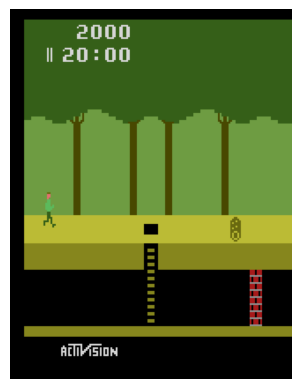

In [4]:
# Print dimensions of state and action space
print("State space: {}".format(env.observation_space))
print(f"Action space: {env.action_space}")
print(f"Action space: {env.unwrapped.get_action_meanings()}")

# Sample random action
action =env.action_space.sample()
print("Action: {}".format(action))
next_state, reward, done,_,info = env.step(action)

# Print output
print("Reward: {}".format(reward))
print(f"State done :{done}")
print(f"State info :{info}")

# Render and plot an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [5]:
def run_animation(experience_buffer):
    """Function to run animation"""
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        
        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        #print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")
        # Pauze animation
        sleep(time_lag)

In [6]:
def store_episode_as_gif(experience_buffer, path='./', filename='animation.gif'):
    """Store episode as gif animation"""
    fps = 5   # Set framew per seconds
    dpi = 300  # Set dots per inch
    interval = 50  # Interval between frames (in ms)

    # Retrieve frames from experience buffer
    frames = []
    for experience in experience_buffer:
        frames.append(experience['frame'])

    # Fix frame size
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    # Generate animation
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=interval)

    # Save output as gif
    anim.save(path + filename, writer='imagemagick', fps=fps)

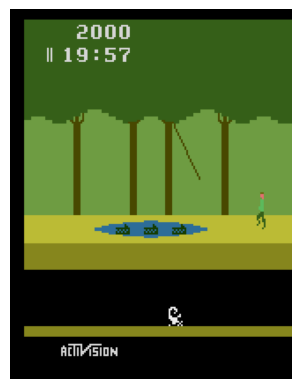

Episode: 1/1
Epoch: 49/49
Action: 17
Reward: 0.0
# epochs: 50
# failed drop-offs: 0


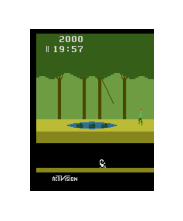

In [171]:
"""Simulation with random agent"""
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False

state = env.reset()

#while not done: ## full run - takes a long time
while epoch < 50:
    # Sample random action
    "Action selection without action mask"
    action = env.action_space.sample()

    "Action selection with action mask"
    #action = env.action_space.sample(env.action_mask(state))

    state, reward, done, _,info = env.step(action)
    cum_reward += reward

    # Store experience in dictionary
    experience_buffer.append({
        "frame": env.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)
store_episode_as_gif(experience_buffer)

print("# epochs: {}".format(epoch))
print("# failed drop-offs: {}".format(num_failed_dropoffs))


# **2. Trying existing models**

In [7]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from gymnasium.wrappers import GrayScaleObservation
from stable_baselines3 import PPO
import torch
from stable_baselines3.common.callbacks import BaseCallback
import os

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
print(device)

cuda


## **Proximal Policy Optimization (PPO) - no modifications**

In [15]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = 'model'
            self.model.save(model_path)

        return True

In [23]:
callback = TrainAndLoggingCallback(check_freq=20000, save_path='.')

In [17]:
"""Adapt env to return gray pictures and stack 4 frames"""
env.reset()
env_PPO = GrayScaleObservation(env,keep_dim=True)
env_PPO = DummyVecEnv([lambda: env_PPO])
env_PPO = VecFrameStack(env_PPO, 4, channels_order='last')

In [27]:
del model

In [18]:
"""Create model"""
model = PPO('CnnPolicy', env_PPO, verbose=1, learning_rate=0.000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [31]:
"""Train Model"""
model.learn(total_timesteps=1000000,callback=callback,log_interval=10)

------------------------------------------
| time/                   |              |
|    fps                  | 89           |
|    iterations           | 10           |
|    time_elapsed         | 57           |
|    total_timesteps      | 5120         |
| train/                  |              |
|    approx_kl            | 8.934445e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.81        |
|    explained_variance   | 0.374        |
|    learning_rate        | 1e-06        |
|    loss                 | -0.00141     |
|    n_updates            | 4380         |
|    policy_gradient_loss | -0.000753    |
|    value_loss           | 0.00796      |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 87            |
|    iterations           | 20            |
|    time_elapsed         | 117           |
|    total_timesteps      | 10240         |
| train/                  |               |
|    approx_kl            | 0.00025197142 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.81         |
|    explained_variance   | 0.216         |
|    learning_rate        | 1e-06         |
|    loss                 | -0.00407      |
|    n_updates            | 4480          |
|    policy_gradient_loss | -0.00223      |
|    value_loss           | 0.00481       |
-------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 85           |
|    iterations           | 30           |
|    time_elapsed         | 180          |
|    total_timesteps      | 15360        |
| train/                  |              |
|    approx_kl            | 9.292248e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.81        |
|    explained_variance   | -1.41        |
|    learning_rate        | 1e-06        |
|    loss                 | -0.0036      |
|    n_updates            | 4580         |
|    policy_gradient_loss | -0.000782    |
|    value_loss           | 0.00321      |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 83            |
|    iterations           | 40            |
|    time_elapsed         | 244           |
|    total_timesteps      | 20480         |
| train/                  |               |
|    approx_kl            | 0.00015599269 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.8          |
|    explained_variance   | -0.732        |
|    learning_rate        | 1e-06         |
|    loss                 | -0.00264      |
|    n_updates            | 4680          |
|    policy_gradient_loss | -0.00125      |
|    value_loss           | 0.00174       |
-------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 82            |
|    iterations           | 50            |
|    time_elapsed         | 309           |
|    total_timesteps      | 25600         |
| train/                  |               |
|    approx_kl            | 0.00029529724 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.79         |
|    explained_variance   | -7.56         |
|    learning_rate        | 1e-06         |
|    loss                 | -0.00314      |
|    n_updates            | 4780          |
|    policy_gradient_loss | -0.00214      |
|    value_loss           | 0.000106      |
-------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 82            |
|    iterations           | 60            |
|    time_elapsed         | 373           |
|    total_timesteps      | 30720         |
| train/                  |               |
|    approx_kl            | 9.6766395e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.78         |
|    explained_variance   | -63           |
|    learning_rate        | 1e-06         |
|    loss                 | -0.00165      |
|    n_updates            | 4880          |
|    policy_gradient_loss | -0.000857     |
|    value_loss           | 3.29e-05      |
-------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 81            |
|    iterations           | 70            |
|    time_elapsed         | 439           |
|    total_timesteps      | 35840         |
| train/                  |               |
|    approx_kl            | 4.8867427e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.76         |
|    explained_variance   | 0.61          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.232         |
|    n_updates            | 4980          |
|    policy_gradient_loss | -0.000316     |
|    value_loss           | 0.543         |
-------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 80            |
|    iterations           | 80            |
|    time_elapsed         | 510           |
|    total_timesteps      | 40960         |
| train/                  |               |
|    approx_kl            | 0.00014019094 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.76         |
|    explained_variance   | -0.675        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.00111       |
|    n_updates            | 5080          |
|    policy_gradient_loss | -0.00101      |
|    value_loss           | 0.00913       |
-------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 79           |
|    iterations           | 90           |
|    time_elapsed         | 576          |
|    total_timesteps      | 46080        |
| train/                  |              |
|    approx_kl            | 6.321678e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.71        |
|    explained_variance   | 0.159        |
|    learning_rate        | 1e-06        |
|    loss                 | 12.4         |
|    n_updates            | 5180         |
|    policy_gradient_loss | -0.000248    |
|    value_loss           | 13.1         |
------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 79           |
|    iterations           | 100          |
|    time_elapsed         | 640          |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0002690449 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.7         |
|    explained_variance   | 0.548        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.248        |
|    n_updates            | 5280         |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 0.649        |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 79            |
|    iterations           | 110           |
|    time_elapsed         | 707           |
|    total_timesteps      | 56320         |
| train/                  |               |
|    approx_kl            | 0.00010046526 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.7          |
|    explained_variance   | 0.231         |
|    learning_rate        | 1e-06         |
|    loss                 | 4.8           |
|    n_updates            | 5380          |
|    policy_gradient_loss | -0.000465     |
|    value_loss           | 16.5          |
-------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 79           |
|    iterations           | 120          |
|    time_elapsed         | 775          |
|    total_timesteps      | 61440        |
| train/                  |              |
|    approx_kl            | 0.0010591564 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.66        |
|    explained_variance   | -0.182       |
|    learning_rate        | 1e-06        |
|    loss                 | -0.00301     |
|    n_updates            | 5480         |
|    policy_gradient_loss | -0.00395     |
|    value_loss           | 0.00585      |
------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 78           |
|    iterations           | 130          |
|    time_elapsed         | 842          |
|    total_timesteps      | 66560        |
| train/                  |              |
|    approx_kl            | 0.0001773655 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.61        |
|    explained_variance   | -0.955       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.000203     |
|    n_updates            | 5580         |
|    policy_gradient_loss | -0.000984    |
|    value_loss           | 0.00248      |
------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 78           |
|    iterations           | 140          |
|    time_elapsed         | 915          |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0003467874 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.59        |
|    explained_variance   | -3.26        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.00112      |
|    n_updates            | 5680         |
|    policy_gradient_loss | -0.0025      |
|    value_loss           | 0.00248      |
------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 77           |
|    iterations           | 150          |
|    time_elapsed         | 985          |
|    total_timesteps      | 76800        |
| train/                  |              |
|    approx_kl            | 0.0007147819 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.62        |
|    explained_variance   | 0.609        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.00154      |
|    n_updates            | 5780         |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 0.0176       |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 77            |
|    iterations           | 160           |
|    time_elapsed         | 1051          |
|    total_timesteps      | 81920         |
| train/                  |               |
|    approx_kl            | 0.00049285474 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.61         |
|    explained_variance   | 0.927         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.00248       |
|    n_updates            | 5880          |
|    policy_gradient_loss | -0.00215      |
|    value_loss           | 0.0145        |
-------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 77            |
|    iterations           | 170           |
|    time_elapsed         | 1117          |
|    total_timesteps      | 87040         |
| train/                  |               |
|    approx_kl            | 9.8396325e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.6          |
|    explained_variance   | 0.168         |
|    learning_rate        | 1e-06         |
|    loss                 | 16.6          |
|    n_updates            | 5980          |
|    policy_gradient_loss | -1.04e-05     |
|    value_loss           | 22.2          |
-------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 77            |
|    iterations           | 180           |
|    time_elapsed         | 1185          |
|    total_timesteps      | 92160         |
| train/                  |               |
|    approx_kl            | 0.00019609451 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.62         |
|    explained_variance   | -3.15         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0103        |
|    n_updates            | 6080          |
|    policy_gradient_loss | -0.000854     |
|    value_loss           | 0.0225        |
-------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 77           |
|    iterations           | 190          |
|    time_elapsed         | 1256         |
|    total_timesteps      | 97280        |
| train/                  |              |
|    approx_kl            | 0.0001260034 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.68        |
|    explained_variance   | -0.889       |
|    learning_rate        | 1e-06        |
|    loss                 | -0.00279     |
|    n_updates            | 6180         |
|    policy_gradient_loss | -0.000713    |
|    value_loss           | 0.00451      |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 77            |
|    iterations           | 200           |
|    time_elapsed         | 1322          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00042012252 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.66         |
|    explained_variance   | -0.25         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.019         |
|    n_updates            | 6280          |
|    policy_gradient_loss | -0.00237      |
|    value_loss           | 0.0479        |
-------------------------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 77          |
|    iterations           | 210         |
|    time_elapsed         | 1387        |
|    total_timesteps      | 107520      |
| train/                  |             |
|    approx_kl            | 0.000274539 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.67       |
|    explained_variance   | 0.571       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0125      |
|    n_updates            | 6380        |
|    policy_gradient_loss | -0.00143    |
|    value_loss           | 0.122       |
-----------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 77            |
|    iterations           | 220           |
|    time_elapsed         | 1454          |
|    total_timesteps      | 112640        |
| train/                  |               |
|    approx_kl            | 5.0774077e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.67         |
|    explained_variance   | 0.118         |
|    learning_rate        | 1e-06         |
|    loss                 | 2.37          |
|    n_updates            | 6480          |
|    policy_gradient_loss | -0.000744     |
|    value_loss           | 5.95          |
-------------------------------------------

KeyboardInterrupt: 

In [13]:
"""Save Model"""
model.save('model')

In [32]:
"""Load Model"""
model = PPO.load('model.zip',env=env_PPO)

Wrapping the env in a VecTransposeImage.

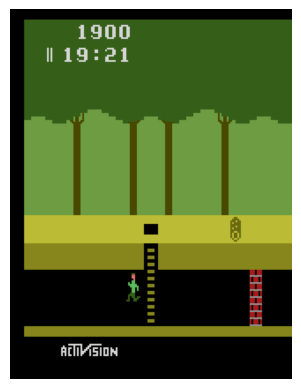

KeyboardInterrupt: 

In [33]:
"""Test Model"""
import time
# Start the game 
state = env_PPO.reset()
done = False
# Loop through the game
while not done: 
    action, _ = model.predict(state)
    state, reward, done, info = env_PPO.step(action)
    frame = env_PPO.render()
    clear_output()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    time.sleep(0.01)
    

## **Proximal Policy Optimization (PPO) - costum wrapper**

In [256]:
from gymnasium.wrappers import ResizeObservation
from images.models import BaseModel

In [269]:
m = BaseModel()
m.load_state_dict(torch.load('images/model.h5'))
m.eval()

BaseModel(
  (conv1): Conv2d(3, 16, kernel_size=(10, 10), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(10, 10), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=7744, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
)

In [328]:
class CustomEnv(gym.Wrapper):
    
    def __init__(self, env,model): 
        super().__init__(env)
        self.env = env
        self.lives = 3
        self.model = model
        
    def step(self, action):
        before_lives = self.lives
        next_state, reward, done,truncated, info = self.env.step(action)
        
        predict = self.make_underground_prediction(next_state)
        # pensalises if player is underground
        if(predict == 1):
            reward -= 1
        
        #save_frame(next_state)
        
        lives = info['lives']
        # intensifies rewards
        if reward < 0 or reward > 0:
            reward *= 10
            
        # losing a life or all lifes is penalised
        if before_lives > lives:
            reward -= 10
            done = True
        self.lives = lives
        return next_state, reward, done,truncated, info 

    def make_underground_prediction(self, img):
        '''Checks if player is underground'''
        img = self.preprocessar(img)
        img = img.astype(np.float32)
        img = Tensor(img)
        img = img.reshape(1,3,130,130)
        pred = self.model(img)
        pred = pred.detach().cpu().detach().numpy()[0].argmax()
        return pred

    def preprocessar(self,imagem):
        imagem = np.array(imagem)
        data_mean = np.mean(imagem)
        data_std = np.std(imagem)
        imagem = (imagem - data_mean) / data_std
        xmax, xmin = imagem.max(), imagem.min()
        imagem = (imagem - xmin)/(xmax - xmin)
        imagem = imagem.transpose(2,1,0)
        return imagem

    def save_frame(state):
        '''Saves frame in file'''
        data = im.fromarray(next_state)
        data.save(f'images/unlabelled/frame{epoch}.png')

    

In [341]:
env_test = CustomEnv(ResizeObservation(env,(130,130)),m)
env_test = GrayScaleObservation(env_test,keep_dim=True)

In [342]:
env_test.reset()

(array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 {'lives': 3, 'episode_frame_number': 0, 'frame_number': 5903996})

State space: Box(0, 255, (130, 130, 1), uint8)
Action space: Discrete(18)
Action: 3
Reward: 0.0
State done :False
State truncated :False
State info :{'lives': 3, 'episode_frame_number': 4, 'frame_number': 5904000}


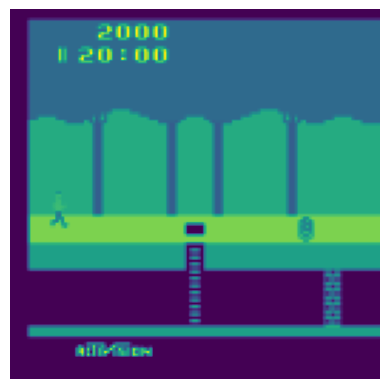

In [343]:
# Print dimensions of state and action space
print("State space: {}".format(env_test.observation_space))
print(f"Action space: {env_test.action_space}")
#print(f"Action space: {env_test.unwrapped.get_action_meanings()}")

# Sample random action
action = 3
print("Action: {}".format(action))
next_state, reward, done,truncated,info = env_test.step(action)

# Print output
print("Reward: {}".format(reward))
print(f"State done :{done}")
print(f"State truncated :{truncated}")
print(f"State info :{info}")

# Render and plot an environment frame
#frame = env.render()
plt.imshow(next_state)
plt.axis("off")
plt.show()

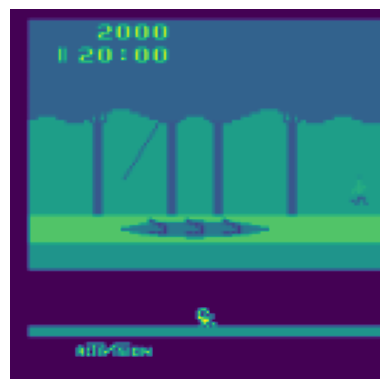

KeyboardInterrupt: 

In [344]:
# env_test.reset()
# done = False
# epoch = 500
# while not done:
#     clear_output()
#     action = env_test.action_space.sample()
#     next_state, reward, done,truncated,info = env_test.step(action)
#     plt.imshow(next_state)
#     plt.axis("off")
#     plt.show()
#     time.sleep(0.1)
#     epoch+=1

In [345]:
#env_test = DummyVecEnv([lambda: env_test])
#env_test = VecFrameStack(env_test, 4, channels_order='last')

In [346]:
print("State space: {}".format(env_test.observation_space))

State space: Box(0, 255, (130, 130, 1), uint8)


In [347]:
next_state, reward, done,info = env_test.step([action])
plt.figure(figsize=(20,16))
for idx in range(next_state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(next_state[0][:,:,idx])
plt.show()

TypeError: list indices must be integers or slices, not list

In [348]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = 'model_custom6'
            self.model.save(model_path)

        return True

In [349]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path='.')

In [350]:
logdir = 'logs'

In [353]:
"""Create model"""
model = PPO('MlpPolicy', env_test, verbose=1, learning_rate=0.000001, n_steps=256,tensorboard_log=logdir) 

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [354]:
model.learn(total_timesteps=1000000,callback=callback,reset_num_timesteps=False,log_interval=10,tb_log_name='PPO')

Logging to logs\PPO_0
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 496          |
|    ep_rew_mean          | -320         |
| time/                   |              |
|    fps                  | 69           |
|    iterations           | 10           |
|    time_elapsed         | 36           |
|    total_timesteps      | 2560         |
| train/                  |              |
|    approx_kl            | 3.958121e-09 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.89        |
|    explained_variance   | -0.000143    |
|    learning_rate        | 1e-06        |
|    loss                 | 2.57e+03     |
|    n_updates            | 90           |
|    policy_gradient_loss | -1.85e-06    |
|    value_loss           | 4.4e+03      |
------------------------------------------
--------------------------------------------
| rollout/                |   

KeyboardInterrupt: 

In [295]:
"""Save Model"""
model.save('model_custom5')

In [303]:
"""Load Model"""
model = PPO.load('model_custom5_1M.zip',env=env_test)

Wrapping the env in a VecTransposeImage.


KeyboardInterrupt: 

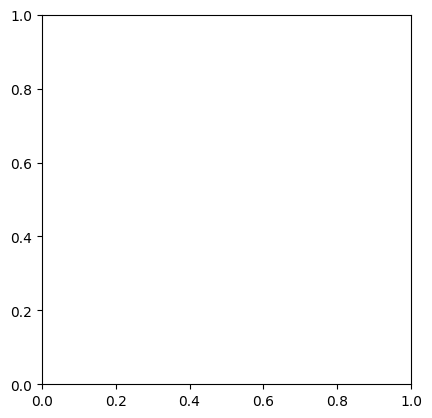

In [19]:
"""Test Model"""

# Start the game 
state = env_test.reset()
done = False
# Loop through the game
while not done: 
    action, _ = model.predict(state)
    state, reward, done, info = env_test.step(action)
    frame = env_test.render()
    clear_output()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    time.sleep(0.01)

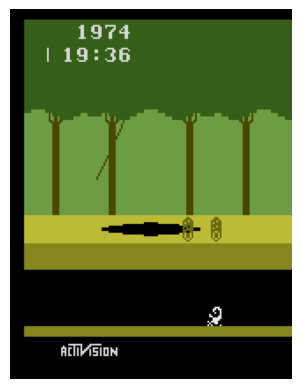

Episode: 1/1
Epoch: 122/299
Action: 14
Reward: -260.0


KeyboardInterrupt: 

In [360]:
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False
min_reward = 0
#state = env_test.reset()[0]

while  epoch < 300:
    action, _ = model.predict(state)

    state, reward, done, _,info = env_test.step(action)
    
    
    cum_reward += reward
    # Store experience in dictionary
    experience_buffer.append({
        "frame": env_test.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)
store_episode_as_gif(experience_buffer,"animation2.gif")


In [175]:
actions = [x['action'] for x in experience_buffer]
unique_actions = set()
for a in actions:
    unique_actions.add(a[0])

print(unique_actions)

{8, 17}


# **3. Making costum model**

In [ ]:
!pip install tensorflow

In [7]:
!pip install keras-rl2

                                              0.0/52.1 kB ? eta -:--:--
     --------------                         20.5/52.1 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  51.2/52.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 52.1/52.1 kB 536.8 kB/s eta 0:00:00


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy

In [173]:
env_c = env
#env_c = GrayScaleObservation(env_c,keep_dim=True)
height, width, channels = env_c.observation_space.shape
actions = env_c.action_space.n

In [162]:
env_c = CustomEnv(env_c)

In [176]:
next_state, reward, done,_,info = env_c.step(action)

# Print output
print(f"Next state: {next_state.shape}")
print(f"State info :{info}")
print(f"State done :{done}")
print("Reward: {}".format(reward))

Next state: (210, 160, 3)
State info :{'lives': 3, 'episode_frame_number': 8, 'frame_number': 28}
State done :False
Reward: 0.0


In [177]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
    model.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [178]:
model = build_model(height, width, channels, actions)

In [179]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 3, 51, 39, 32)     6176      
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 24, 18, 64)     32832     
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 22, 16, 64)     36928     
                                                                 
 flatten_9 (Flatten)         (None, 67584)             0         
                                                                 
 dense_39 (Dense)            (None, 512)               34603520  
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 18)               

In [180]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

In [181]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-4), metrics=['mae'])

In [182]:
dqn.fit(env_c, nb_steps=10000, visualize=False, verbose=2)

Training for 10000 steps ...


AttributeError: 'int' object has no attribute 'shape'

In [ ]:
scores = dqn.test(env_c, nb_episodes=10, visualize=True)
print(np.mean(scores.history['episode_reward']))

# 4

In [366]:
from stable_baselines3.common.env_util import make_atari_env
from gymnasium import spaces


In [361]:
env_c = CustomEnv(ResizeObservation(env,(130,130)),m)
env_c = GrayScaleObservation(env_c,keep_dim=True)

In [362]:
env_c.reset()

(array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 {'lives': 3, 'episode_frame_number': 0, 'frame_number': 6063291})

In [370]:
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor


class CustomCNN(BaseFeaturesExtractor):
    """
    :param observation_space: (gym.Space)
    :param features_dim: (int) Number of features extracted.
        This corresponds to the number of unit for the last layer.
    """

    def __init__(self, observation_space: spaces.Box, features_dim: int = 256):
        super().__init__(observation_space, features_dim)
        # We assume CxHxW images (channels first)
        # Re-ordering will be done by pre-preprocessing or wrapper
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 32, kernel_size=8, stride=4, padding=0),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(
                torch.as_tensor(observation_space.sample()[None]).float()
            ).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.linear(self.cnn(observations))



In [371]:
policy_kwargs = dict(
    features_extractor_class=CustomCNN,
    features_extractor_kwargs=dict(features_dim=128),
)
model = PPO("CnnPolicy", env_c, policy_kwargs=policy_kwargs, verbose=1)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [378]:
model.learn(100000,reset_num_timesteps=False)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 695      |
|    ep_rew_mean     | -415     |
| time/              |          |
|    fps             | 78       |
|    iterations      | 1        |
|    time_elapsed    | 26       |
|    total_timesteps | 168387   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 695         |
|    ep_rew_mean          | -415        |
| time/                   |             |
|    fps                  | 71          |
|    iterations           | 2           |
|    time_elapsed         | 57          |
|    total_timesteps      | 170435      |
| train/                  |             |
|    approx_kl            | 0.020775445 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.54       |
|    explained_variance   | 0.648       |
|    learning_rate        | 0.

KeyboardInterrupt: 

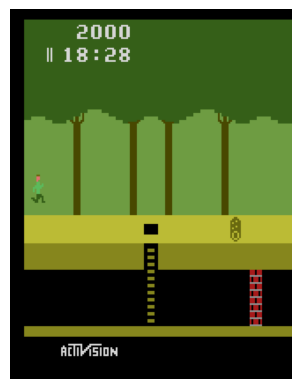

In [ ]:
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False
min_reward = 0
#state = env_c.reset()[0]

while  epoch < 300:
    action, _ = model.predict(state)

    state, reward, done, _,info = env_c.step(action)
    
    
    cum_reward += reward
    # Store experience in dictionary
    experience_buffer.append({
        "frame": env_c.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)
store_episode_as_gif(experience_buffer,"animation2.gif")